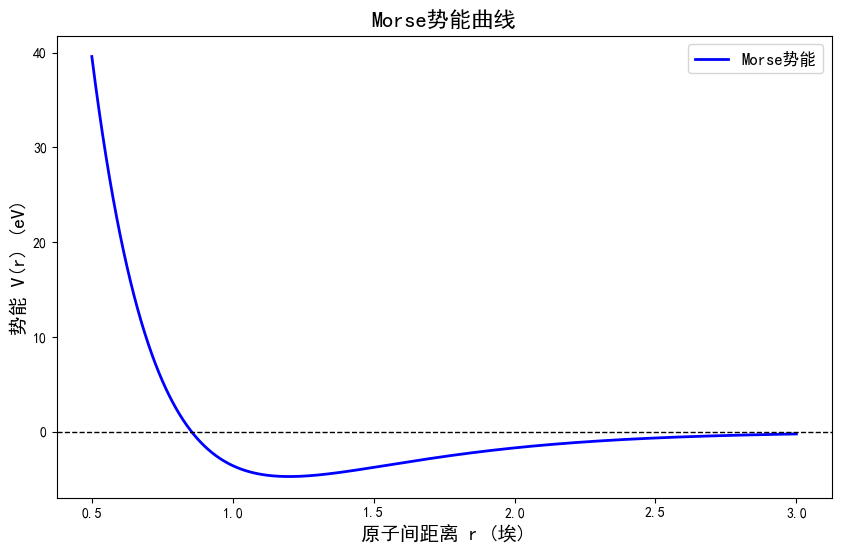

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Windows: 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 防止负号显示异常
# Morse势能参数
D_e = 4.75    
r_e = 1.2     
a = 2.0      

def morse_potential(r, D_e=D_e, r_e=r_e, a=a):
    return D_e * (1 - np.exp(-a * (r - r_e)))**2 - D_e

# 构造 r 数据，注意避免 r=0 处的问题
r_values = np.linspace(0.5, 3.0, 1000)
V_values = morse_potential(r_values)

plt.figure(figsize=(10, 6))
plt.plot(r_values, V_values, 'b-', lw=2, label="Morse势能")
plt.xlabel("原子间距离 r (埃)", fontsize=14)
plt.ylabel("势能 V(r) (eV)", fontsize=14)
plt.title("Morse势能曲线", fontsize=16)
plt.axhline(y=0, color='k', lw=1,linestyle='--')
plt.legend(fontsize=12)
plt.savefig("./output/Morse势能曲线.png", dpi=300)
plt.show()


Simulating trajectory: 100%|██████████| 3000/3000 [00:00<00:00, 43131.90it/s]


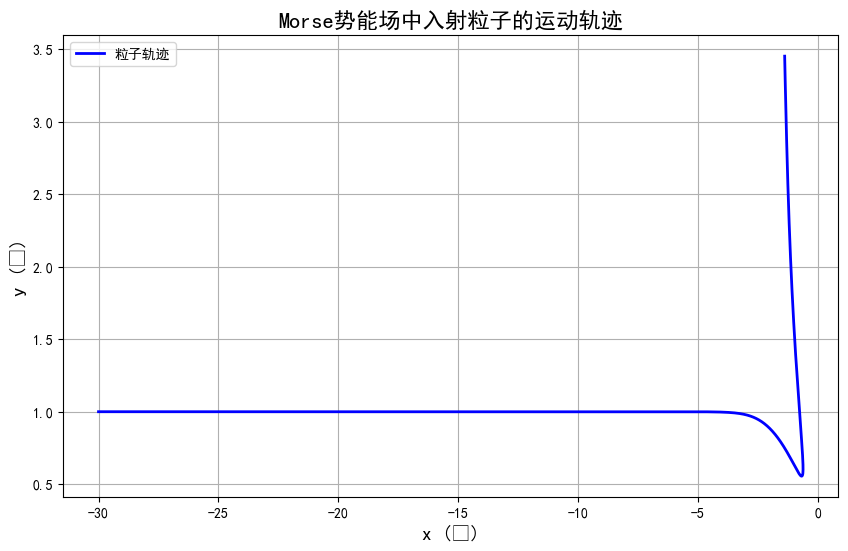

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


# Morse势能函
def morse_potential(r, D_e=D_e, r_e=r_e, a=a):
    return D_e * (1 - np.exp(-a * (r - r_e)))**2 - D_e

# 计算 Morse 势能的径向导数 dV/dr
def dV_dr(r, D_e=D_e, r_e=r_e, a=a):
    # 当 r 很小时，为避免数值问题，这里直接返回较大值或0
    if r < 1e-6:
        return 0.0
    return 2 * D_e * a * np.exp(-a * (r - r_e)) * (1 - np.exp(-a * (r - r_e)))

# Morse 势能下的力函数（二维）：F(r_vec) = - dV/dr * (r_vec/r)
def morse_force(r_vec):
    r = np.linalg.norm(r_vec)
    if r < 1e-6:
        return np.array([0.0, 0.0])
    force_magnitude = - dV_dr(r)
    return force_magnitude * r_vec / r


steps = 3000            # 模拟总步数
dt = 0.01               # 时间步长
x0 = -30.0              # 初始 x 坐标
y0 = 1.0                # 初始 y 坐标，设定为 0 (或可以添加随机扰动)
v0 = 1.0               # 初始速度大小（水平入射，即初始速度为 (v0,0)）
mass = 1.0              # 质量，取1（单位统一）

# 记录轨迹
trajectory = np.zeros((steps, 2))

# 初始条件
r = np.array([x0, y0])
v = np.array([v0, 0.0])


for i in tqdm(range(steps), desc="Simulating trajectory"):
    trajectory[i] = r.copy()
    # 计算当前加速度
    a_vec = morse_force(r) / mass  # a = F/m, 此处 m=1
    # 位置更新：r_new = r + v*dt + 0.5*a*dt^2
    r_new = r + v * dt + 0.5 * a_vec * dt**2
    # 计算新位置的加速度
    a_new = morse_force(r_new) / mass
    # 速度更新： v_new = v + 0.5*(a+a_new)*dt
    v = v + 0.5 * (a_vec + a_new) * dt
    r = r_new


plt.figure(figsize=(10, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], 'b-', lw=2, label="粒子轨迹")
plt.xlabel("x (Å)", fontsize=14)
plt.ylabel("y (Å)", fontsize=14)
plt.title("Morse势能场中入射粒子的运动轨迹", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


Simulating trajectories for different b: 100%|██████████| 10/10 [00:00<00:00, 27.02it/s]


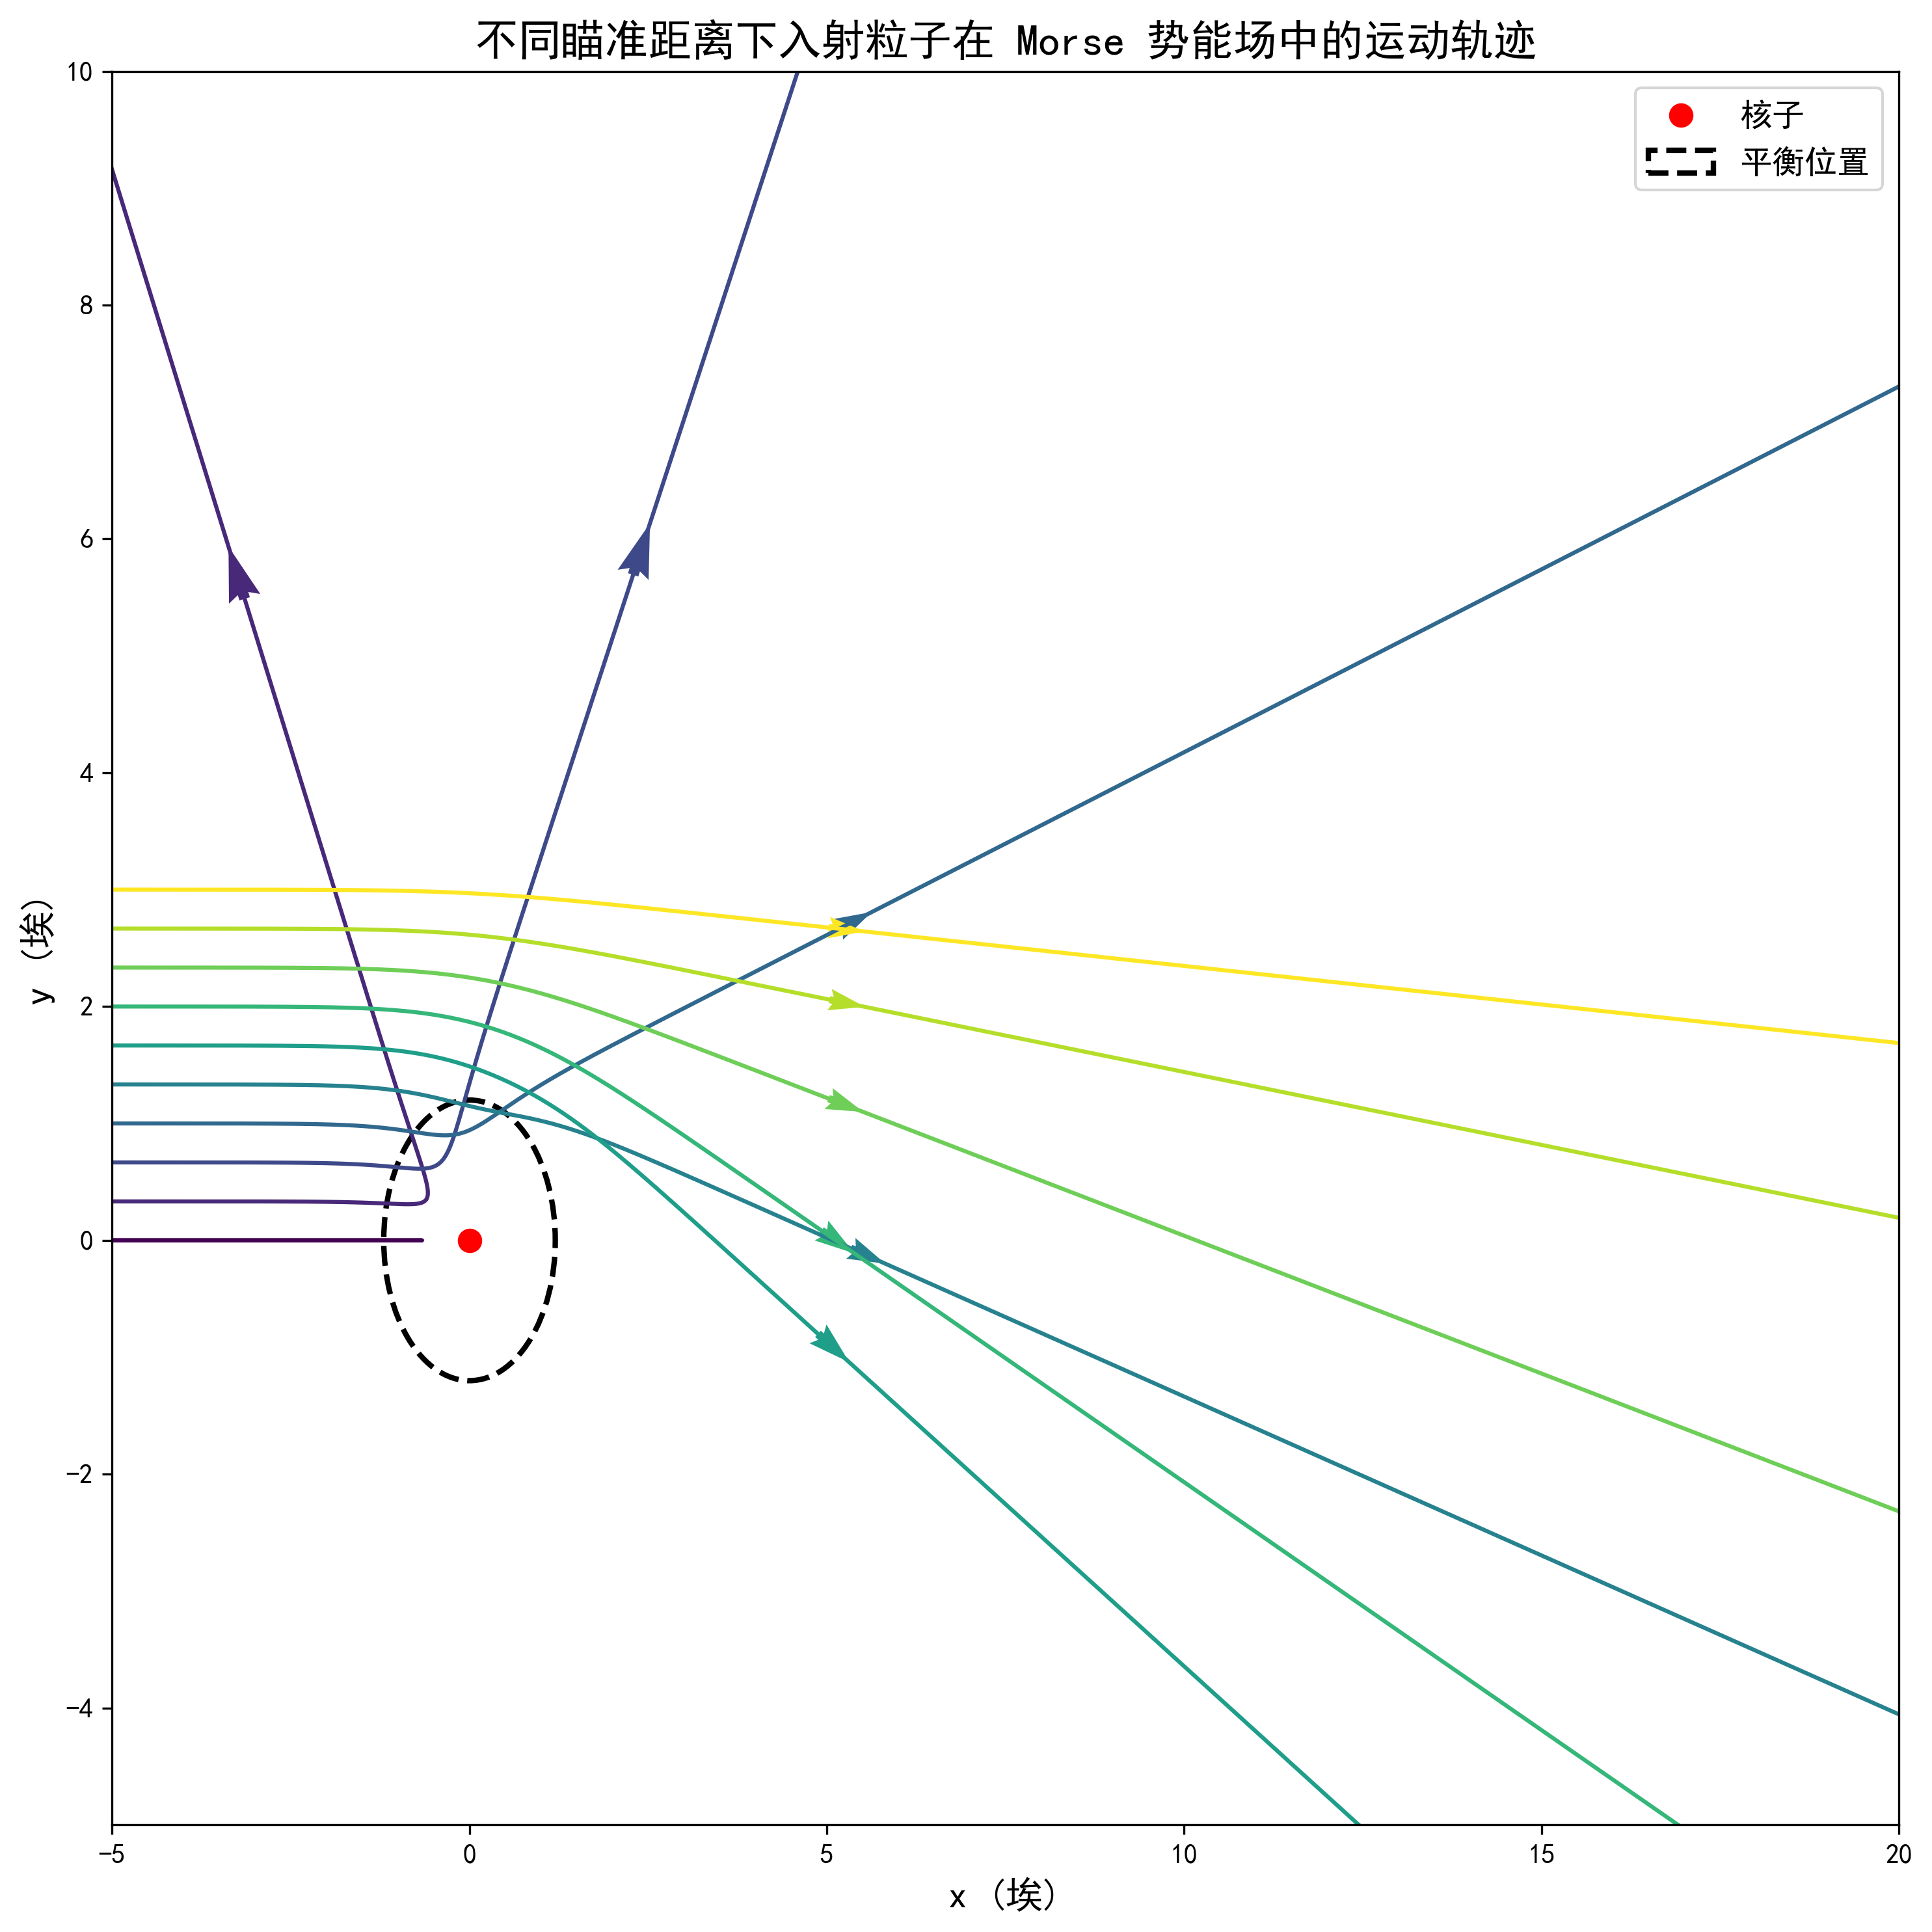

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 定义 Morse 势能函数
def morse_potential(r, D_e=D_e, r_e=r_e, a=a_param):
    return D_e * (1 - np.exp(-a * (r - r_e)))**2 - D_e

# Morse 势能的径向导数 dV/dr
def dV_dr(r, D_e=D_e, r_e=r_e, a=a_param):
    if r < 1e-6:
        return 0.0
    return 2 * D_e * a * np.exp(-a * (r - r_e)) * (1 - np.exp(-a * (r - r_e)))

# 定义 Morse 势能下的力函数（二维），其中 r_vec 为 [x, y]
def morse_force(r_vec):
    r = np.linalg.norm(r_vec)
    if r < 1e-6:
        return np.array([0.0, 0.0])
    force_magnitude = - dV_dr(r)
    return force_magnitude * r_vec / r

steps = 2000       # 模拟步数
dt = 0.01          # 时间步长
speed = 5.0       # 入射速度（统一）
x0 = -30.0         # 入射起始位置

# 选择不同的瞄准距离 (b 值)
b_values = np.linspace(0.0, 3.0, 10)

# 用于存储不同瞄准距离下的轨迹（此处每个 b 值只模拟一条轨迹，可根据需要扩展）
trajectories = {}
for b in b_values:
    trajectories[b] = []

for b in tqdm(b_values, desc="Simulating trajectories for different b"):
    # 初始条件：从 (x0, b) 发射
    r = np.array([x0, b])
    v = np.array([speed, 0.0])
    traj = np.zeros((steps, 2))
    for i in range(steps):
        traj[i] = r.copy()
        a_vec = morse_force(r)
        # 使用速度-Verlet方法更新
        r_new = r + v * dt + 0.5 * a_vec * dt**2
        a_new = morse_force(r_new)
        v = v + 0.5 * (a_vec + a_new) * dt
        r = r_new
    trajectories[b].append(traj)

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
colors = plt.cm.viridis(np.linspace(0, 1, len(b_values)))

for idx, b in enumerate(b_values):
    for traj in trajectories[b]:
        ax.plot(traj[:, 0], traj[:, 1], color=colors[idx], lw=1.5)
        # 添加箭头：选择轨迹中40%的位置及其后一点计算箭头向量
        arrow_index = int(steps * 0.35)
        if arrow_index < steps - 1:
            start_point = traj[arrow_index]
            end_point = traj[arrow_index + 1]
            vector = end_point - start_point
            # 放大箭头显示效果
            scale_factor = 10
            vector = vector * scale_factor
            ax.quiver(start_point[0], start_point[1], vector[0], vector[1],
                      angles='xy', scale_units='xy', scale=1, color=colors[idx])

# 标记出核子位置，例如假设核子位于原点
ax.plot(0, 0, 'ro', ms=8, label="核子")

# 添加平衡位置的圆：圆心在核子位置 (0,0)，半径 r_e
equilibrium_circle = plt.Circle((0, 0), r_e, color='black', fill=False, linestyle='--', lw=2, label="平衡位置")
ax.add_artist(equilibrium_circle)

ax.set_xlabel("x (埃)", fontsize=14)
ax.set_ylabel("y (埃)", fontsize=14)
ax.set_title("不同瞄准距离下入射粒子在 Morse 势能场中的运动轨迹", fontsize=16)
ax.set_xlim(-5, 20)
ax.set_ylim(-5, 10)
ax.legend(fontsize=12)
plt.tight_layout()
plt.savefig("./output/morse_potential_trajectories.png", dpi=300)
plt.show()


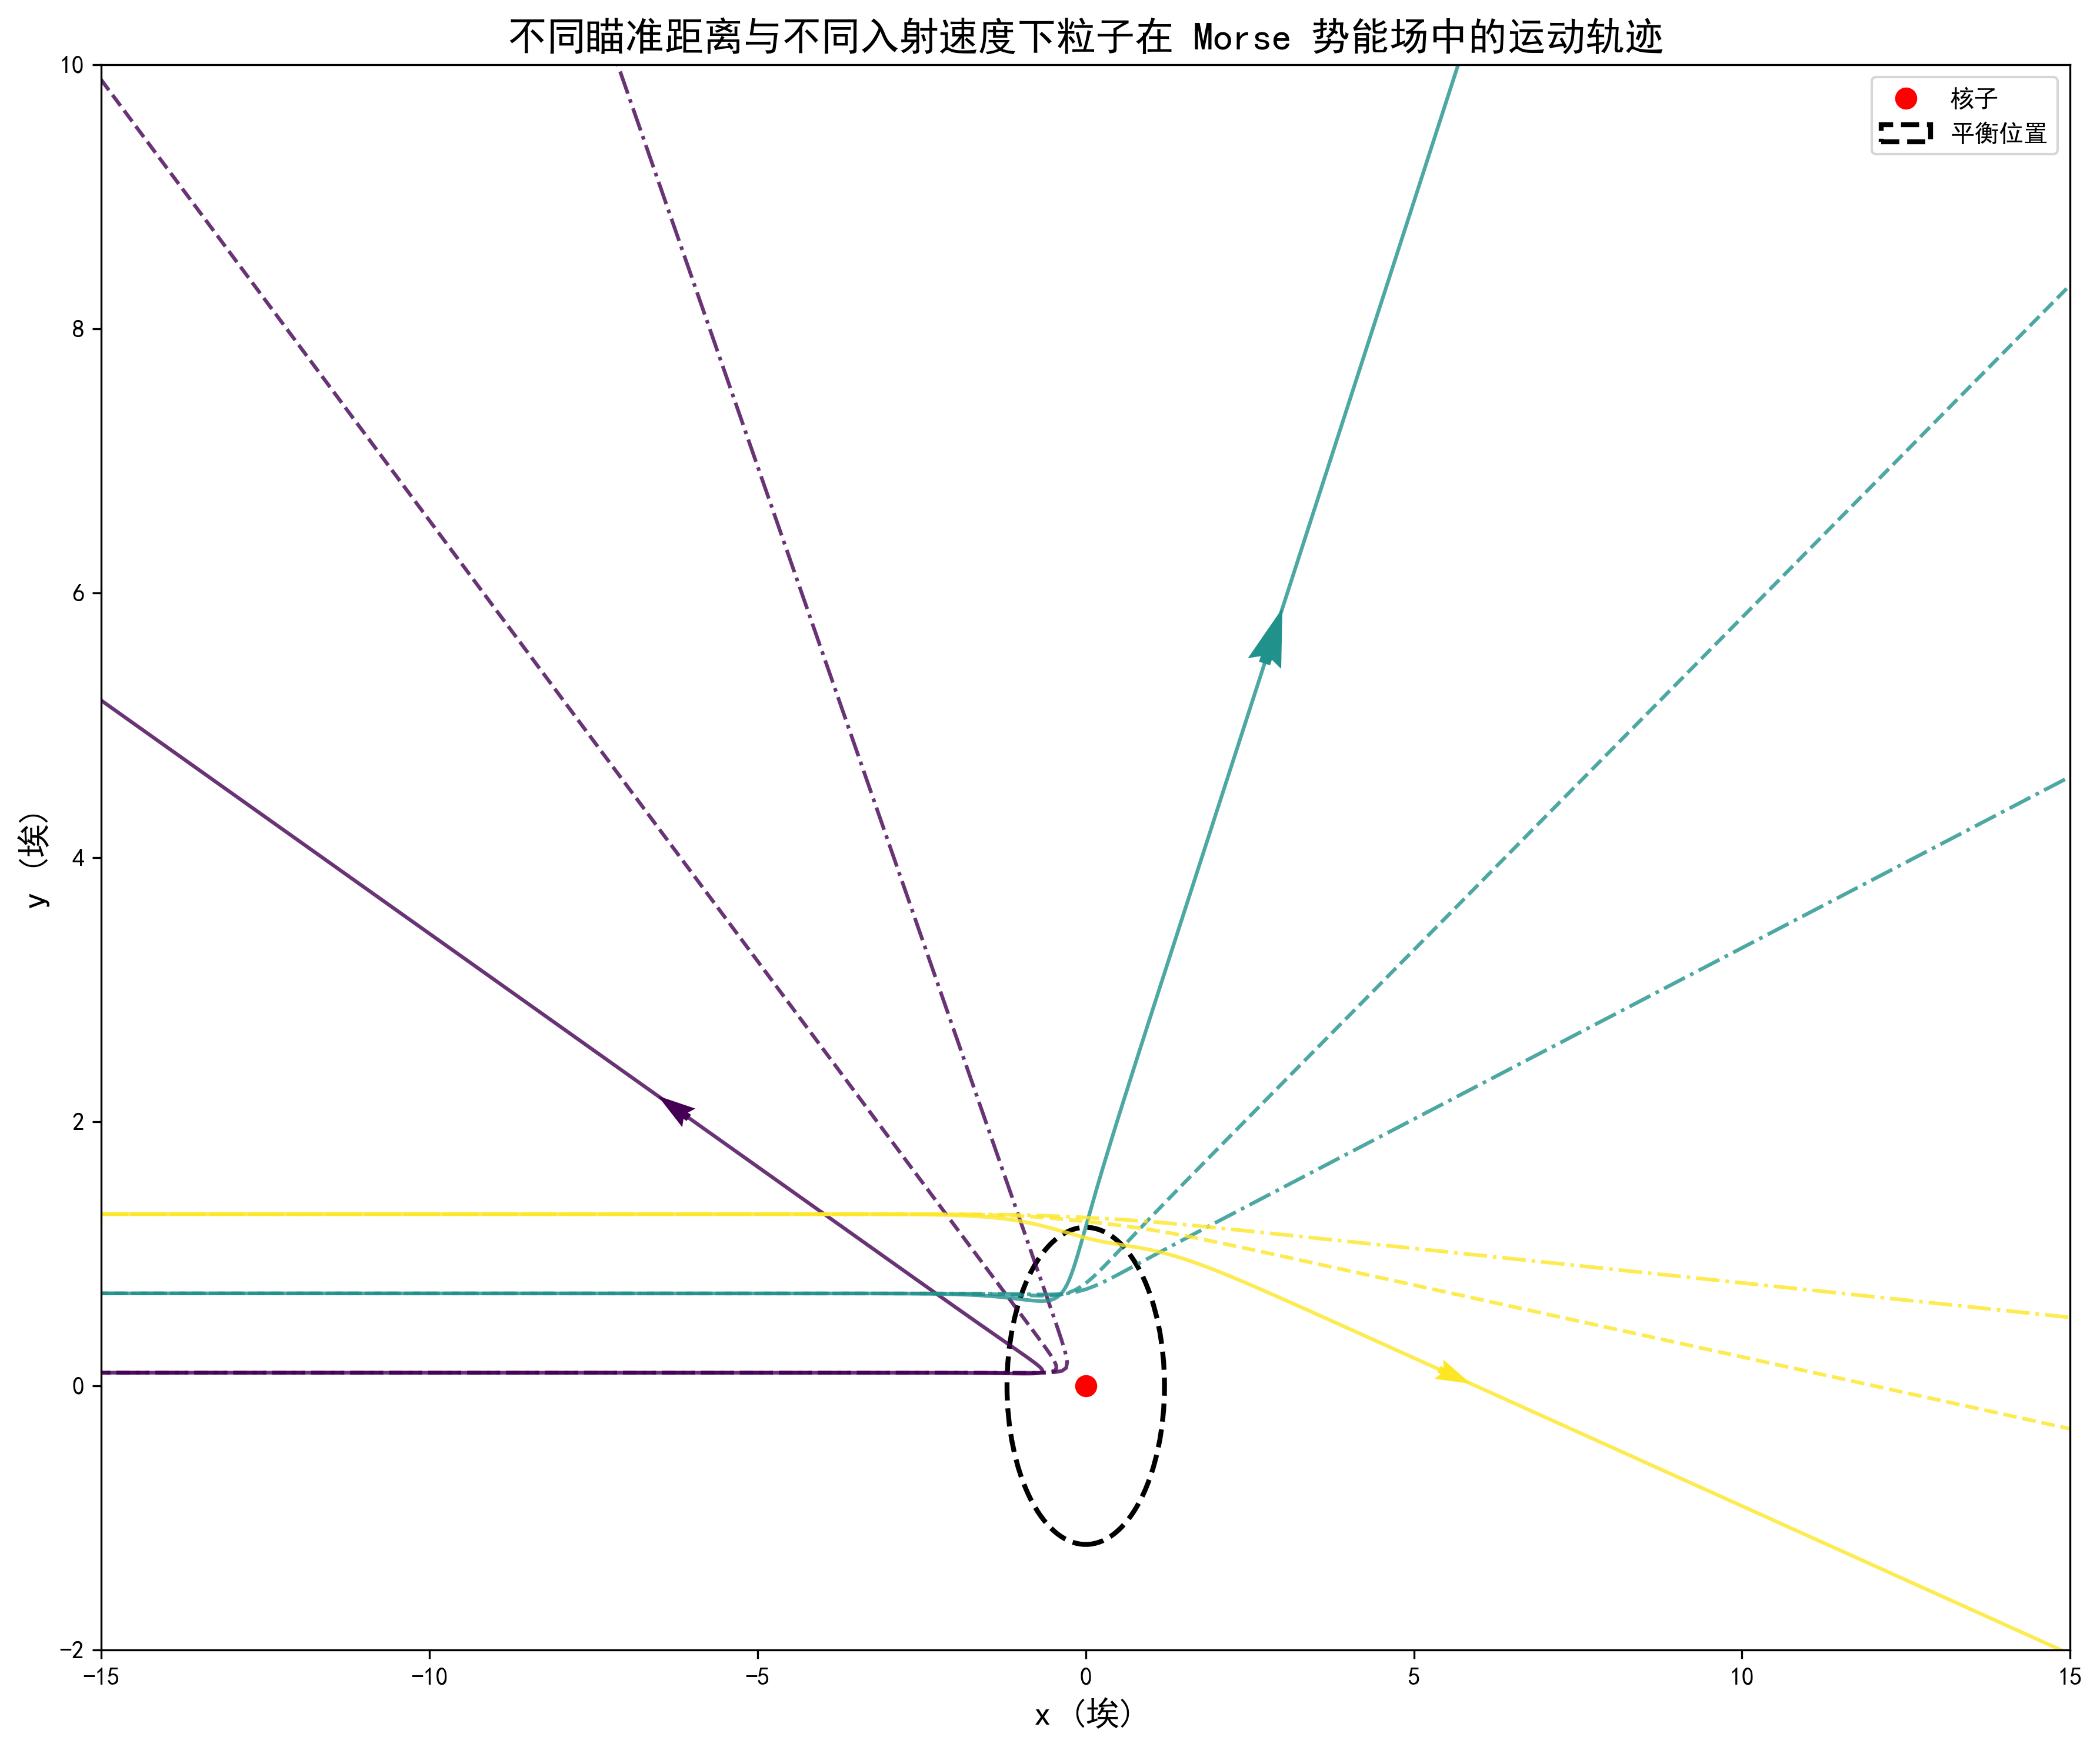

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 定义 Morse 势能函数
def morse_potential(r, D_e=D_e, r_e=r_e, a=a_param):
    return D_e * (1 - np.exp(-a * (r - r_e)))**2 - D_e

# Morse 势能的径向导数 dV/dr
def dV_dr(r, D_e=D_e, r_e=r_e, a=a_param):
    if r < 1e-6:
        return 0.0
    return 2 * D_e * a * np.exp(-a * (r - r_e)) * (1 - np.exp(-a * (r - r_e)))

# 定义 Morse 势能下的力函数（二维）
def morse_force(r_vec):
    r = np.linalg.norm(r_vec)
    if r < 1e-6:
        return np.array([0.0, 0.0])
    force_magnitude = - dV_dr(r)
    return force_magnitude * r_vec / r

steps = 2000      # 模拟步数
dt = 0.01         # 时间步长
# 固定初始速度范围，在这里我们将分别采用3个不同入射速度
speed_values = [5.0, 10.0, 15.0]
x0 = -30.0        # 入射起始位置

# 选择不同的瞄准距离 b（这里 b 为入射点的 y 坐标），例如在 [0, 3] 范围内均匀取值
b_values = np.linspace(0.1, 1.3, 3)

# 用于存储不同 b 值下、不同速度下的轨迹
# 数据结构：trajectories[b] = list of (speed, trajectory) 对
trajectories = {}
for b in b_values:
    trajectories[b] = []
    for speed in speed_values:
        traj = np.zeros((steps, 2))
        # 初始条件：入射点为 (x0, b)
        r = np.array([x0, b])
        v = np.array([speed, 0.0])  # 初始速度水平向右
        for i in range(steps):
            traj[i] = r.copy()
            a_vec = morse_force(r)
            # 速度-Verlet方法更新
            r_new = r + v * dt + 0.5 * a_vec * dt**2
            a_new = morse_force(r_new)
            v = v + 0.5 * (a_vec + a_new) * dt
            r = r_new
        trajectories[b].append((speed, traj))

fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
# 使用不同的颜色区分不同的瞄准距离 (b)
colors = plt.cm.viridis(np.linspace(0, 1, len(b_values)))
# 为每个 b 值，每个不同的速度使用不同的线型（或通过图例标注区分）
linestyles = ['-', '--', '-.']

for idx, b in enumerate(b_values):
    color = colors[idx]
    for j, (speed, traj) in enumerate(trajectories[b]):
        # 绘制轨迹
        label_str = f"b={b:.1f}, v0={speed:.1f}" if idx==0 else None
        ax.plot(traj[:, 0], traj[:, 1], color=color, linestyle=linestyles[j],
                lw=1.5, alpha=0.8)
        # 为轨迹添加箭头: 选取轨迹中40%处的两个点计算位移矢量，并放大显示
        arrow_index = int(steps * 0.35)
        if arrow_index < steps - 1:
            start_point = traj[arrow_index]
            end_point = traj[arrow_index + 1]
            vector = end_point - start_point
            scale_factor = 10
            vector = vector * scale_factor
            ax.quiver(start_point[0], start_point[1],
                      vector[0], vector[1],
                      angles='xy', scale_units='xy', scale=1, color=color)
            
# 标记核子位置（假设核子位于原点）
ax.plot(0, 0, 'ro', ms=8, label="核子")

# 添加平衡位置的圆：以核子为圆心，半径为 r_e
equilibrium_circle = plt.Circle((0, 0), r_e, color='black', fill=False,
                                linestyle='--', lw=2, label="平衡位置")
ax.add_artist(equilibrium_circle)

ax.set_xlabel("x (埃)", fontsize=14)
ax.set_ylabel("y (埃)", fontsize=14)
ax.set_title("不同瞄准距离与不同入射速度下粒子在 Morse 势能场中的运动轨迹", fontsize=16)
ax.set_xlim(-15, 15)
ax.set_ylim(-2, 10)
ax.legend(fontsize=10, loc='upper right')
plt.tight_layout()
plt.savefig("./output/morse_trajectories_diff_speed.png", dpi=300)
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

D_e = 4.75    # 势阱深度 (eV)
r_e = 1.2     # 平衡键长 (Å)
a_param = 2.0 # 参数 a

# Morse 势能函数
def morse_potential(r, D_e=D_e, r_e=r_e, a=a_param):
    return D_e * (1 - np.exp(-a * (r - r_e)))**2 - D_e

# Morse 势能的径向导数 dV/dr
def dV_dr(r, D_e=D_e, r_e=r_e, a=a_param):
    if r < 1e-6:
        return 0.0
    return 2 * D_e * a * np.exp(-a * (r - r_e)) * (1 - np.exp(-a * (r - r_e)))

# 定义 Morse 势能下的力（二维）
# 计算力 F = -dV/dr * (r_vec / r)
def morse_force(r_vec):
    r = np.linalg.norm(r_vec)
    if r < 1e-6:
        return np.array([0.0, 0.0])
    force_magnitude = - dV_dr(r)
    return force_magnitude * r_vec / r

steps = 2000    # 模拟步数
dt = 0.01       # 时间步长
x0 = -5.0      # 入射起始位置

R_cut = 10.0    # 当粒子运动到距离散射中心大于 R_cut 时，认为散射过程结束

num_speed = 20000  # 模拟粒子数
speed_min, speed_max = 5.0, 15.0
scattering_angles_speed = []  # 存储散射角（单位：度）

for _ in tqdm(range(num_speed), desc="Simulating different speeds"):
    # 固定瞄准距离 b = 0.5，入射角 0°
    r = np.array([x0, 0.5])
    # 随机采样速度
    speed = np.random.uniform(speed_min, speed_max)
    v = np.array([speed, 0.0])
    
    # Verlet 积分模拟
    for i in range(steps):
        a_vec = morse_force(r)
        r = r + v * dt + 0.5 * a_vec * dt**2
        a_new = morse_force(r)
        v = v + 0.5 * (a_vec + a_new) * dt
        if np.linalg.norm(r) > R_cut:
            angle = np.arctan2(v[1], v[0])  # 以弧度表示
            scattering_angles_speed.append(np.degrees(angle))
            break

num_angle = 20000
incident_angle_min, incident_angle_max = -30.0, 30.0
scattering_angles_angle = []  # 存储最终散射角（度）

for _ in tqdm(range(num_angle), desc="Simulating different angles"):
    r = np.array([x0, 0.0])
    # 随机采样入射角度（以度计），转换为弧度，保证方向仍向右
    theta_inc = np.radians(np.random.uniform(incident_angle_min, incident_angle_max))
    v = 10.0 * np.array([np.cos(theta_inc), np.sin(theta_inc)])
    
    for i in range(steps):
        a_vec = morse_force(r)
        r = r + v * dt + 0.5 * a_vec * dt**2
        a_new = morse_force(r)
        v = v + 0.5 * (a_vec + a_new) * dt
        if np.linalg.norm(r) > R_cut:
            angle = np.arctan2(v[1], v[0])
            scattering_angles_angle.append(np.degrees(angle))
            break

num_b = 20000
b_min, b_max = -1.3, 1.3
scattering_angles_b = []  # 存储散射角（度）
for _ in tqdm(range(num_b), desc="Simulating different impact parameters"):
    # 随机采样瞄准距离 b
    b = np.random.uniform(b_min, b_max)
    r = np.array([x0, b])
    v = np.array([10.0, 0.0])  # 水平入射
    for i in range(steps):
        a_vec = morse_force(r)
        r = r + v * dt + 0.5 * a_vec * dt**2
        a_new = morse_force(r)
        v = v + 0.5 * (a_vec + a_new) * dt
        if np.linalg.norm(r) > R_cut:
            angle = np.arctan2(v[1], v[0])
            scattering_angles_b.append(np.degrees(angle))
            break



Simulating different impact parameters: 100%|██████████| 20000/20000 [02:45<00:00, 121.00it/s]


In [12]:
# make cache to save scattering_angles
import os
if not os.path.exists("./cache"):
    os.makedirs("./cache")
np.savez("./cache/scattering_angles.npz",
        scattering_angles_speed=scattering_angles_speed,
        scattering_angles_angle=scattering_angles_angle,
        scattering_angles_b=scattering_angles_b)


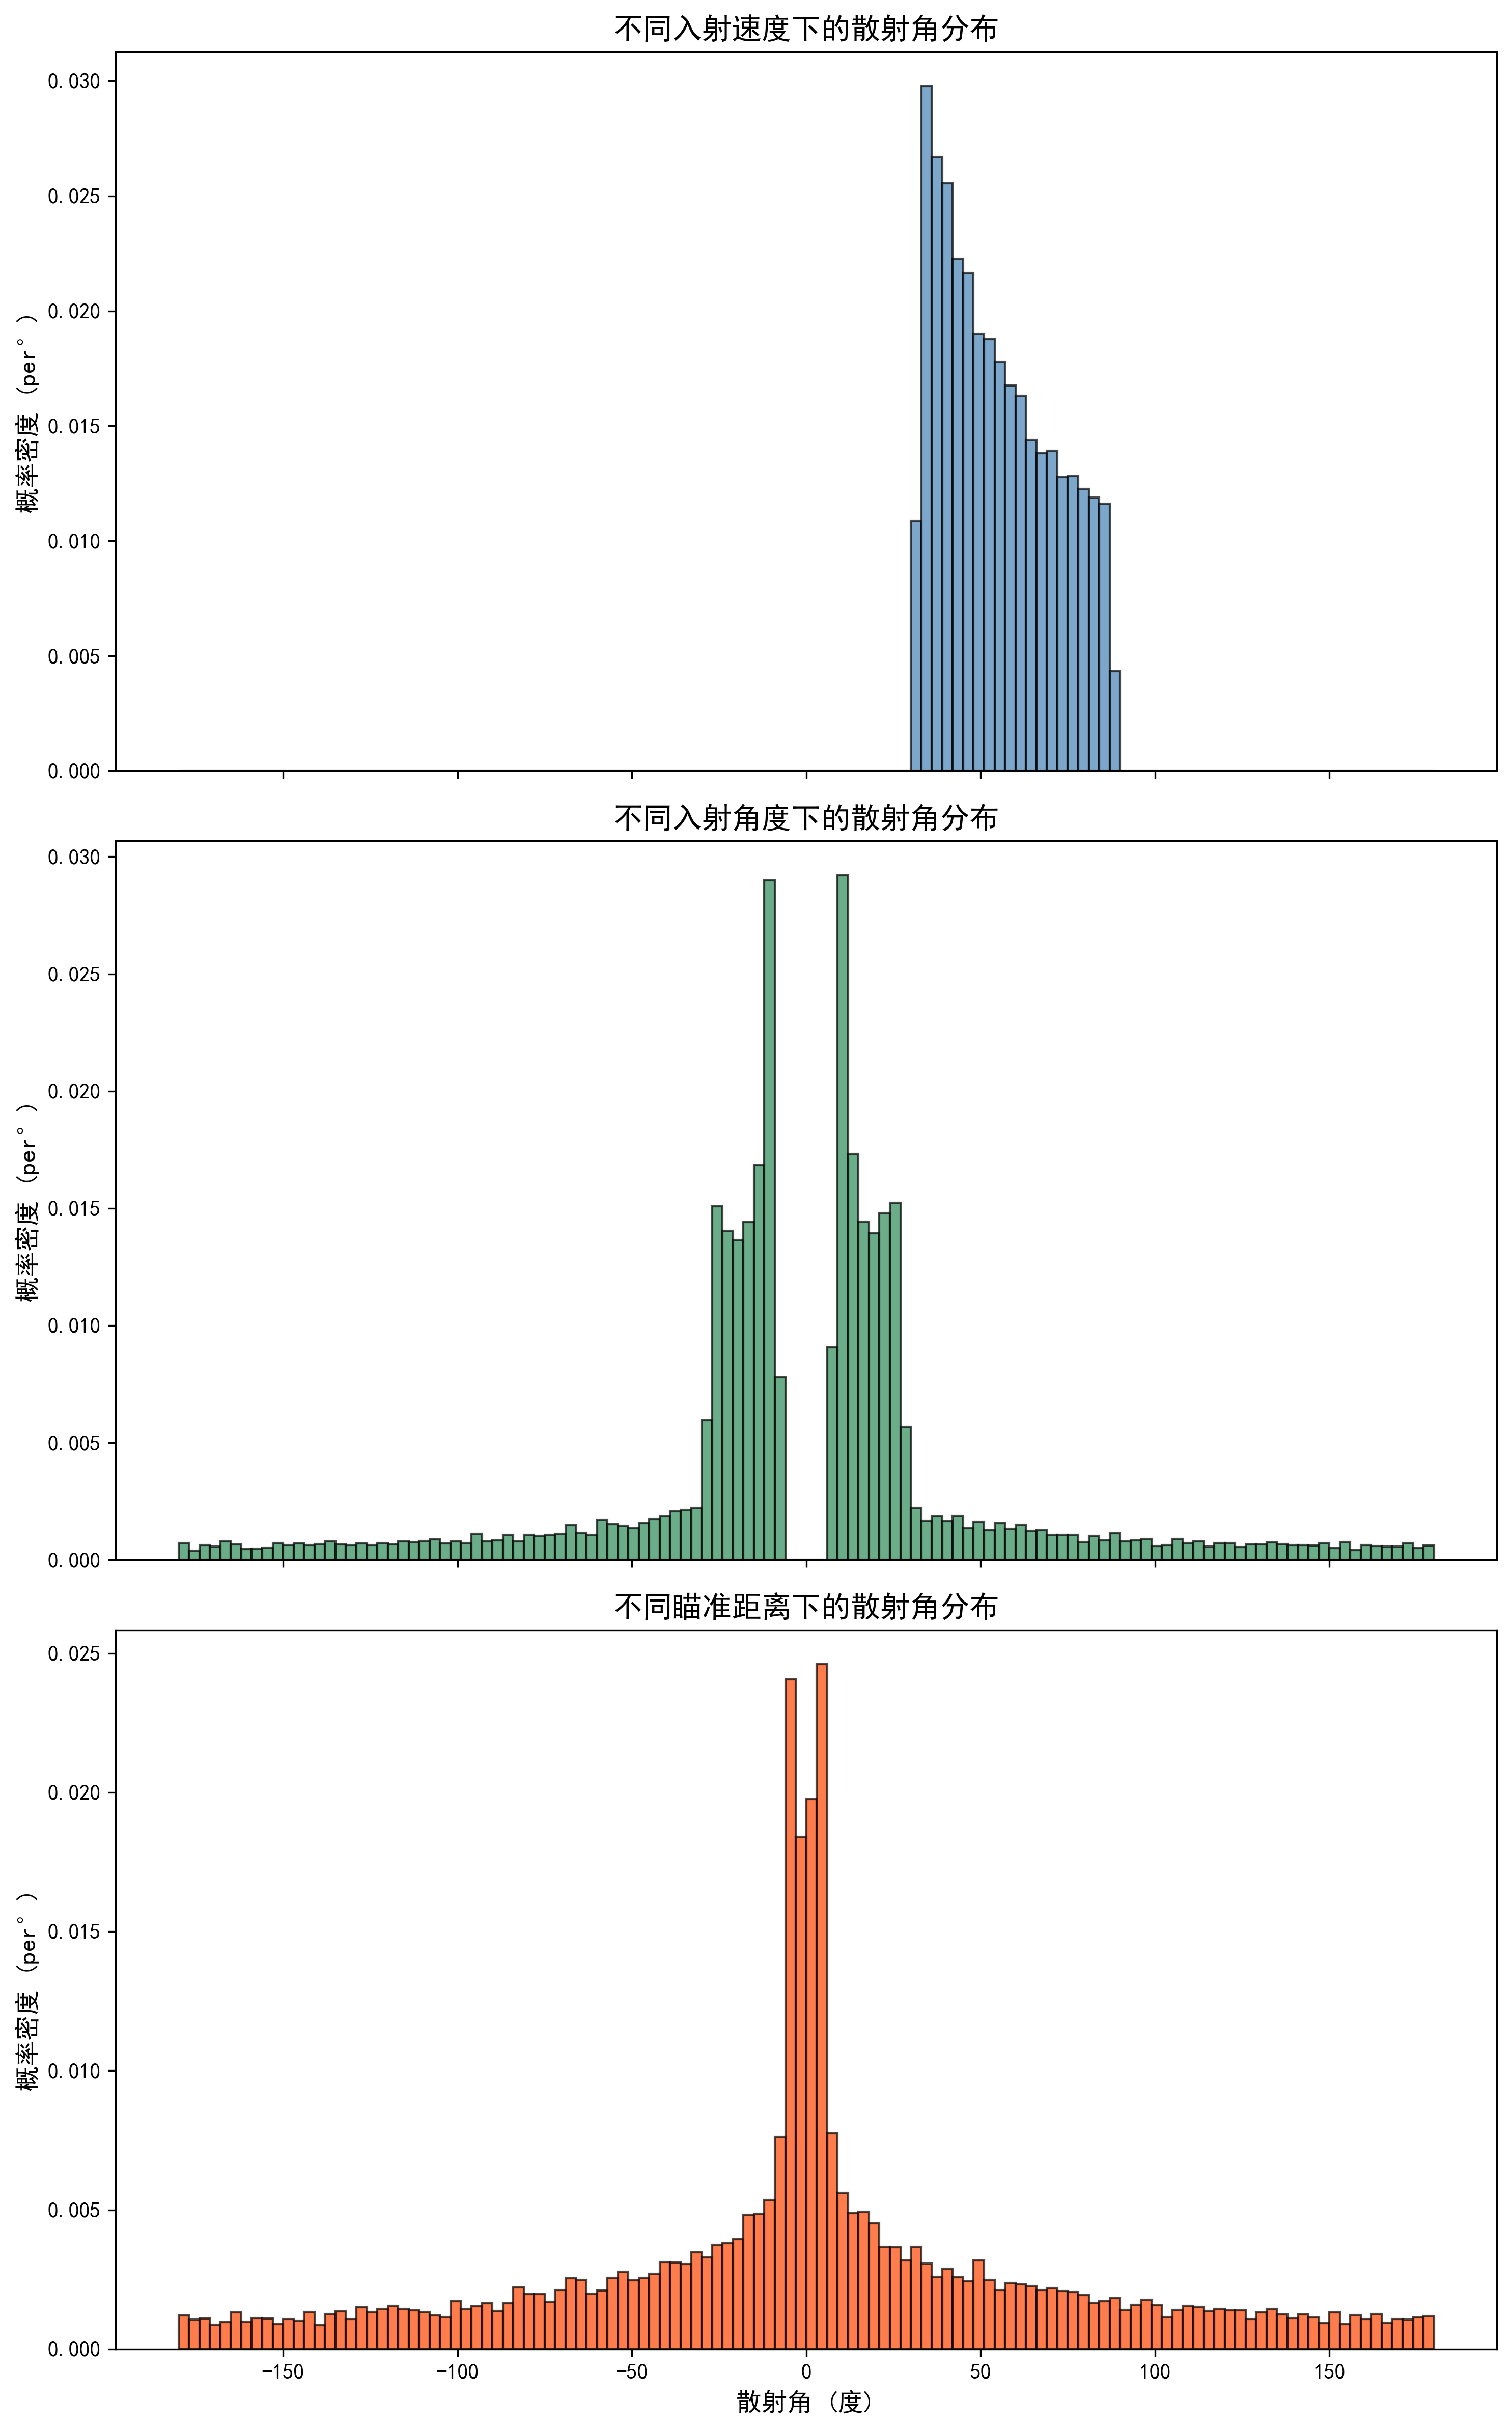

In [13]:
# read cache
try:
    data = np.load("./cache/scattering_angles.npz")
    scattering_angles_speed = data['scattering_angles_speed']
    scattering_angles_angle = data['scattering_angles_angle']
    scattering_angles_b = data['scattering_angles_b']
except FileNotFoundError:
    print("No cache found. Please run the simulation first.")
    exit()

fig, axes = plt.subplots(3, 1, figsize=(10, 16), dpi=300, sharex=True)
bins = np.linspace(-180, 180, 121)  # 散射角范围（度）

axes[0].hist(scattering_angles_speed, bins=bins, density=True, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title("不同入射速度下的散射角分布", fontsize=14)
axes[0].set_ylabel("概率密度 (per°)", fontsize=12)

axes[1].hist(scattering_angles_angle, bins=bins, density=True, color='seagreen', edgecolor='black', alpha=0.7)
axes[1].set_title("不同入射角度下的散射角分布", fontsize=14)
axes[1].set_ylabel("概率密度 (per°)", fontsize=12)

axes[2].hist(scattering_angles_b, bins=bins, density=True, color='orangered', edgecolor='black', alpha=0.7)
axes[2].set_title("不同瞄准距离下的散射角分布", fontsize=14)
axes[2].set_xlabel("散射角 (度)", fontsize=12)
axes[2].set_ylabel("概率密度 (per°)", fontsize=12)

plt.tight_layout()
plt.savefig("./output/Morse_scattering_histograms.png", dpi=300)
plt.show()
